# Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
len(x)


70000

In [8]:
some_digit=x.to_numpy()[36001]
some_digit_image=some_digit.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

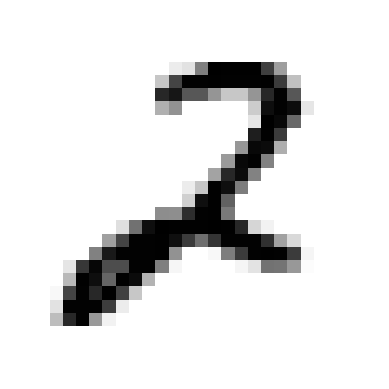

In [9]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [10]:
y[36000]

'9'

In [11]:
x_train,x_test=x[:60000],x[60000:]

In [12]:
y_train,y_test=y[:60000],y[60000:]

In [13]:

shuffle_index = np.random.permutation(len(x_train))
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

# Creating a 2 detector

In [14]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [15]:
y_train_2

9583      True
53539    False
6011     False
15446    False
59279    False
         ...  
14086    False
33731    False
24544    False
34036    False
24254    False
Name: class, Length: 60000, dtype: bool

In [16]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

# Train a logistic regression classifier

In [17]:
clf=LogisticRegression()

In [18]:
clf.fit(x_train,y_train_2)

C:\Users\vivek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
example=clf.predict([some_digit])

C:\Users\vivek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
print(example)

[ True]


# Cross Validation

In [21]:

a=cross_val_score(clf,x_train, y_train_2, cv=3,scoring="accuracy")

C:\Users\vivek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vivek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [22]:
print(a.mean())

0.9783666666666667
